IMPORTING NECESSARY LIBRARIES

In [109]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

DATASET AT A GLANCE:

In [75]:
df = pd.read_csv('/content/house_prices_train - house_prices_train.csv')
df.head()

,Id,LotArea,OverallQual,YearBuilt,RoofStyle,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,1,8450,7,2003,Gable,856,Y,856,854,2,1,3,1,8,2,548,208500
1,2,9600,6,1976,Gable,1262,Y,1262,0,2,0,3,1,6,2,460,181500
2,3,11250,7,2001,Gable,920,Y,920,866,2,1,3,1,6,2,608,223500
3,4,9550,7,1915,Gable,756,Y,961,756,1,0,3,1,7,3,642,140000
4,5,14260,8,2000,Gable,1145,Y,1145,1053,2,1,4,1,9,3,836,250000


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            1460 non-null   int64 
 1   LotArea       1460 non-null   int64 
 2   OverallQual   1460 non-null   int64 
 3   YearBuilt     1460 non-null   int64 
 4   RoofStyle     1460 non-null   object
 5   TotalBsmtSF   1460 non-null   int64 
 6   CentralAir    1460 non-null   object
 7   1stFlrSF      1460 non-null   int64 
 8   2ndFlrSF      1460 non-null   int64 
 9   FullBath      1460 non-null   int64 
 10  HalfBath      1460 non-null   int64 
 11  BedroomAbvGr  1460 non-null   int64 
 12  KitchenAbvGr  1460 non-null   int64 
 13  TotRmsAbvGrd  1460 non-null   int64 
 14  GarageCars    1460 non-null   int64 
 15  GarageArea    1460 non-null   int64 
 16  SalePrice     1460 non-null   int64 
dtypes: int64(15), object(2)
memory usage: 194.0+ KB


In [77]:
df.describe()

,Id,LotArea,OverallQual,YearBuilt,TotalBsmtSF,1stFlrSF,2ndFlrSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,10516.828082,6.099315,1971.267808,1057.429452,1162.626712,346.992466,1.565068,0.382877,2.866438,1.046575,6.517808,1.767123,472.980137,180921.195890
std,421.610009,9981.264932,1.382997,30.202904,438.705324,386.587738,436.528436,0.550916,0.502885,0.815778,0.220338,1.625393,0.747315,213.804841,79442.502883
min,1.000000,1300.000000,1.000000,1872.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,34900.000000
25%,365.750000,7553.500000,5.000000,1954.000000,795.750000,882.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,1.000000,334.500000,129975.000000
50%,730.500000,9478.500000,6.000000,1973.000000,991.500000,1087.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,2.000000,480.000000,163000.000000
75%,1095.250000,11601.500000,7.000000,2000.000000,1298.250000,1391.250000,728.000000,2.000000,1.000000,3.000000,1.000000,7.000000,2.000000,576.000000,214000.000000
max,1460.000000,215245.000000,10.000000,2010.000000,6110.000000,4692.000000,2065.000000,3.000000,2.000000,8.000000,3.000000,14.000000,4.000000,1418.000000,755000.000000


LABEL ENCODING

In [78]:
df['CentralAir'].unique()

array(['Y', 'N'], dtype=object)

In [79]:
label_encoder = preprocessing.LabelEncoder()
df['CentralAir']= label_encoder.fit_transform(df['CentralAir'])

In [80]:
df['CentralAir'].unique()

array([1, 0])

In [81]:
df['RoofStyle'].unique()

array(['Gable', 'Hip', 'Gambrel', 'Mansard', 'Flat', 'Shed'], dtype=object)

In [82]:
df['RoofStyle']= label_encoder.fit_transform(df['RoofStyle'])

In [83]:
df['RoofStyle'].unique()

array([1, 3, 2, 4, 0, 5])

DATA CLEANING

In [84]:
df.isna().any()

Id              False
LotArea         False
OverallQual     False
YearBuilt       False
RoofStyle       False
TotalBsmtSF     False
CentralAir      False
1stFlrSF        False
2ndFlrSF        False
FullBath        False
HalfBath        False
BedroomAbvGr    False
KitchenAbvGr    False
TotRmsAbvGrd    False
GarageCars      False
GarageArea      False
SalePrice       False
dtype: bool

In [85]:
df.duplicated().any()

False

The data was already clean

MODEL BUILDING AND FEATURE SELECTION

In [86]:
X = df.drop(['Id', 'SalePrice'], axis=1) 
y= df['SalePrice']

Checking score on multiple states

In [123]:
pr_scores=[]
for x in range(43):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=x)
  lr = LinearRegression()
  lr.fit(X_train, y_train)
  pr_scores.append(lr.score(X_test, y_test))


In [88]:
min(pr_scores)

0.5955230662023513

In [89]:
max(pr_scores)

0.8347620658632847

The score on average is decent

In [90]:
sum(pr_scores)/len(pr_scores)

0.747507606628508

MULTICOLLINEARITY

In [91]:
X.corr().abs()>0.8

,LotArea,OverallQual,YearBuilt,RoofStyle,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageCars,GarageArea
LotArea,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
OverallQual,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
YearBuilt,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
RoofStyle,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
TotalBsmtSF,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False
CentralAir,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1stFlrSF,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False
2ndFlrSF,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
FullBath,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
HalfBath,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


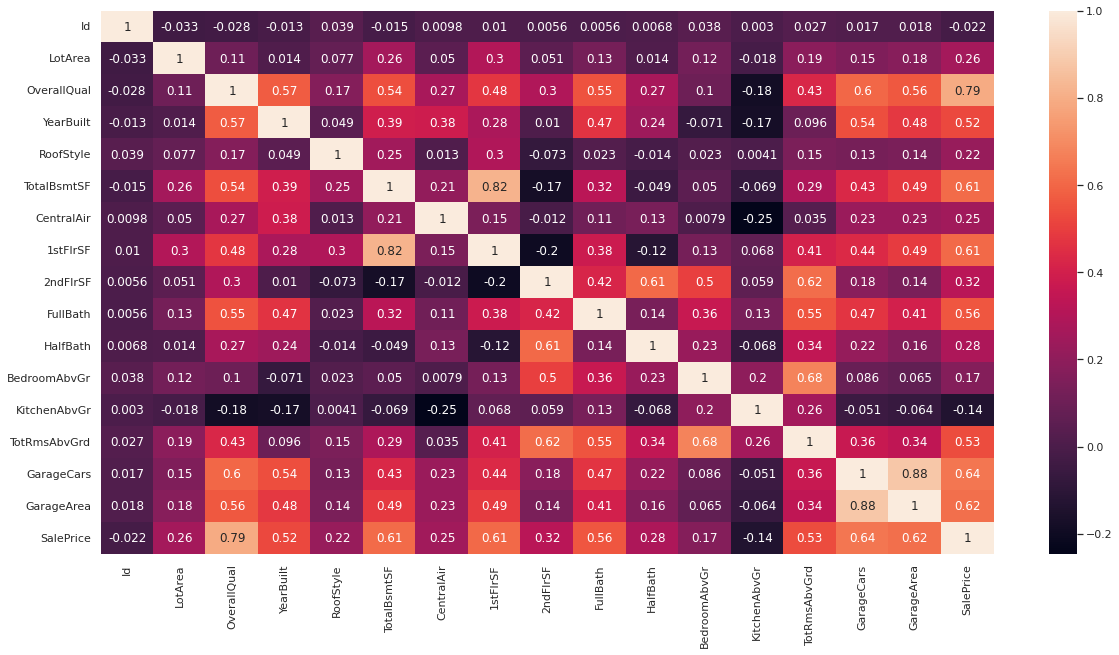

In [92]:
figure = plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot=True)

Removing inputs that are highly correlated

In [93]:
X = df.drop(['Id', 'SalePrice', 'GarageCars','TotalBsmtSF'], axis=1) 
y = df['SalePrice']

In [94]:
pr_scores=[]
for x in range(43):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=x)
  lr = LinearRegression()
  lr.fit(X_train, y_train)
  pr_scores.append(lr.score(X_test, y_test))


Model works better slightly

In [95]:
sum(pr_scores)/len(pr_scores)

0.754473590847308

REMOVING OUTLIERS

In [96]:
from scipy import stats
z = np.abs(stats.zscore(df))
df = df[(z < 3).all(axis=1)]

In [97]:
X = df.drop(['Id', 'SalePrice', 'GarageCars','TotalBsmtSF'], axis=1) 
y = df['SalePrice']

In [98]:
pr_scores=[]
for x in range(43):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=x)
  lr = LinearRegression()
  lr.fit(X_train, y_train)
  pr_scores.append(lr.score(X_test, y_test))

The model works a lot better now with the lowest score even better than the average before removing outliers

In [99]:
sum(pr_scores)/len(pr_scores)

0.8252828801650282

In [100]:
min(pr_scores)

0.7746568840137276

In [101]:
max(pr_scores)

0.8675754198849246

Checking distributions of features

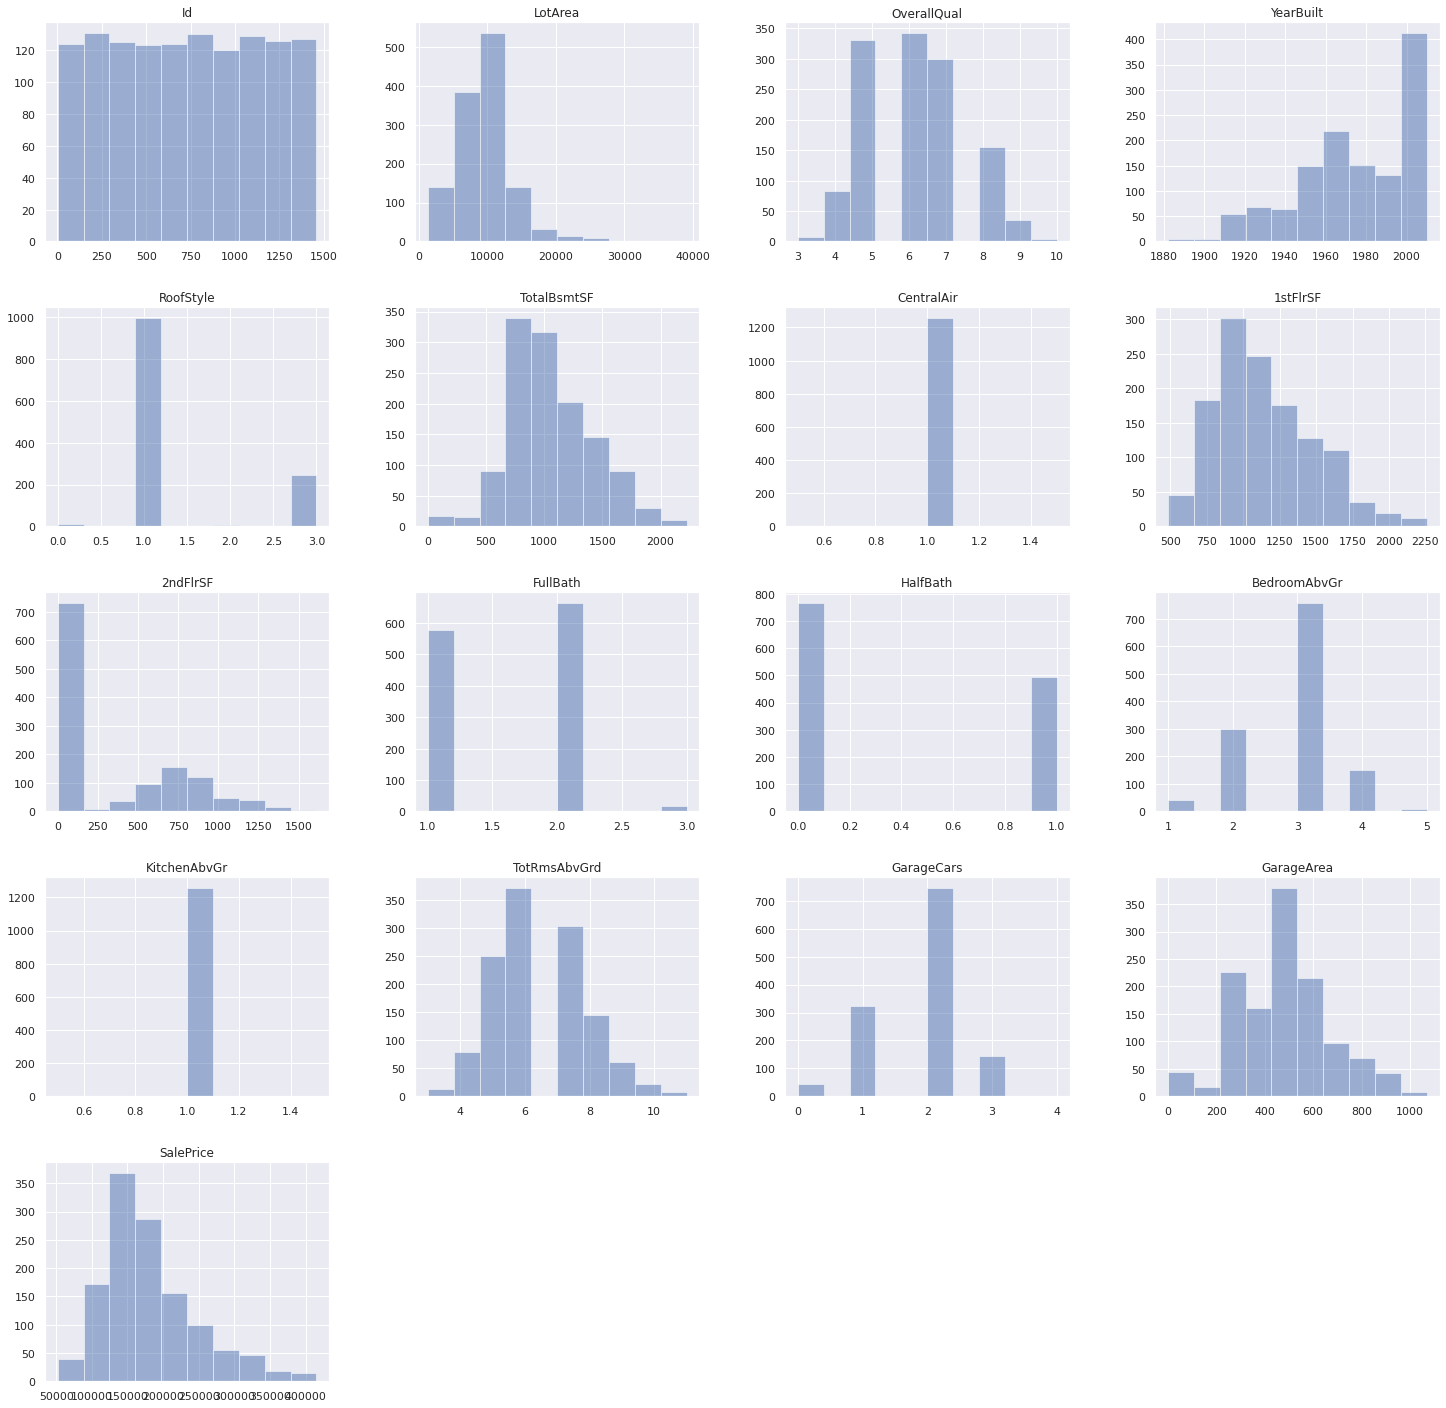

In [102]:
df.hist(alpha=0.5, figsize=(25, 25))
plt.show()

Most of the features we are working on follows non-Gaussian Distribution, hence opting for minmaxscalar. Only GarageArea follows Gaussian here but not applying StandardScalar here on it specfically. 

In [103]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [104]:
pr_scores_scaled = []
for x in range(43):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=x)
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train_scaled = scaler.transform(X_train)
  X_test_scaled = scaler.transform(X_test)
  lr1 = LinearRegression()
  lr1.fit(X_train_scaled, y_train)
  pr_scores_scaled.append(lr1.score(X_test_scaled, y_test))

The scaling seems to have little to no effect on the model

In [105]:
sum(pr_scores_scaled)/len(pr_scores_scaled)

0.8252828801650284

K-FOLD CROSS VALIDATION CHECK

In [106]:
from sklearn.model_selection import cross_val_score
cross_val_score(estimator= lr1,X=X, y=y, cv=5)

array([0.81632182, 0.87961611, 0.80368275, 0.83139154, 0.81781883])

Hyper-Parameter Tuning on cv parameter

In [127]:
cross =[]
for u in range(2,6):
  cross.append(cross_val_score(estimator= lr1,X=X, y=y, cv=u))
cross

[array([0.83280477, 0.81870027]),
 array([0.8389411 , 0.83179984, 0.81786598]),
 array([0.83141887, 0.8390773 , 0.82700643, 0.81957844]),
 array([0.81632182, 0.87961611, 0.80368275, 0.83139154, 0.81781883])]

METRICS:

Creating a dummy model using DummyRegressor and strategy mean and then comparing the MSE, MAE amd RMSE values of our model with Dummy Model for baseline values

In [112]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train, y_train)

DummyRegressor()

In [113]:
pr_dr = dummy_regr.predict(X_test)

In [114]:
print("{0:.2f}".format(mean_absolute_error(y_true=y_test, y_pred= pr_dr)))

53057.75


In [115]:
print("{0:.2f}".format(mean_squared_error(y_true=y_test, y_pred= pr_dr)))

4707421568.66


In [117]:
print("{0:.2f}".format(mean_squared_error(y_true=y_test, y_pred= pr_dr, squared=False)))

68610.65


In [111]:
predictions = lr.predict(X_test)
print("{0:.2f}".format(mean_absolute_error(y_true=y_test, y_pred=predictions)))

18491.65


In [118]:
print("{0:.2f}".format(mean_squared_error(y_true=y_test, y_pred=predictions)))

622507565.22


In [119]:
print("{0:.2f}".format(mean_squared_error(y_true=y_test, y_pred=predictions, squared=False)))

24950.10


The model seems to be working well as the metrics from our model are way less compared to the dummy model